In [15]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [16]:
# Loading the data
raw_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
raw_data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Variable Desciption

Gender (object): Represents the gender of the individual (e.g., male, female).

Age (float64): Indicates the age of the individual in years.

Height (float64): Represents the height of the individual, usually in centimeters or meters.

Weight (float64): Indicates the weight of the individual, usually in kilograms.

family_history_with_overweight (object): Indicates whether the individual has a family history of overweight issues.

FAVC (object): Represents whether the individual frequently consumes high-calorie food (e.g., yes, no).

FCVC (float64): Stands for the Frequency of Consumption of Vegetables, indicating how often the individual consumes                   vegetables.

NCP (float64): Stands for the Number of Main Meals, indicating the number of main meals the individual consumes in a                  day.

CAEC (object): Stands for Consumption of Food between Meals and indicates the frequency of consuming food between                    meals.

SMOKE (object): Indicates whether the individual smokes (e.g., yes, no).

CH2O (float64): Represents the daily consumption of water by the individual.

SCC (object): Stands for the Calories Consumed through Sodas, indicating whether the individual consumes calories                   through sodas (yes, no).

FAF (float64): Stands for Physical Activity Frequency, indicating how often the individual engages in physical                        activities.

TUE (float64): Stands for Time Using Technology Devices, indicating the amount of time the individual spends using                    technology devices.

CALC (object): Indicates whether the individual monitors caloric intake (e.g., yes, no).

MTRANS (object): Stands for Mode of Transportation, indicating the mode of transportation used by the individual.

NObeyesdad (object): Represents the class or label for the level of obesity (e.g., Normal, Overweight_Level_I,                              Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III).

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [19]:
# Descriptive statistics of the data
raw_data.describe().style.background_gradient(cmap='plasma')

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [20]:
#checking for null values and visualizing them
raw_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [21]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.
              format(column, 
        nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.
              format(column, nr_values))

The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :1402
The number of values for feature Height :1574
The number of values for feature Weight :1525
The number of values for feature family_history_with_overweight :2 -- ['no' 'yes']
The number of values for feature FAVC :2 -- ['no' 'yes']
The number of values for feature FCVC :810
The number of values for feature NCP :635
The number of values for feature CAEC :4 -- ['Always' 'Frequently' 'Sometimes' 'no']
The number of values for feature SMOKE :2 -- ['no' 'yes']
The number of values for feature CH2O :1268
The number of values for feature SCC :2 -- ['no' 'yes']
The number of values for feature FAF :1190
The number of values for feature TUE :1129
The number of values for feature CALC :4 -- ['Always' 'Frequently' 'Sometimes' 'no']
The number of values for feature MTRANS :5 -- ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
The number of values for feature NObeyesdad :7 -

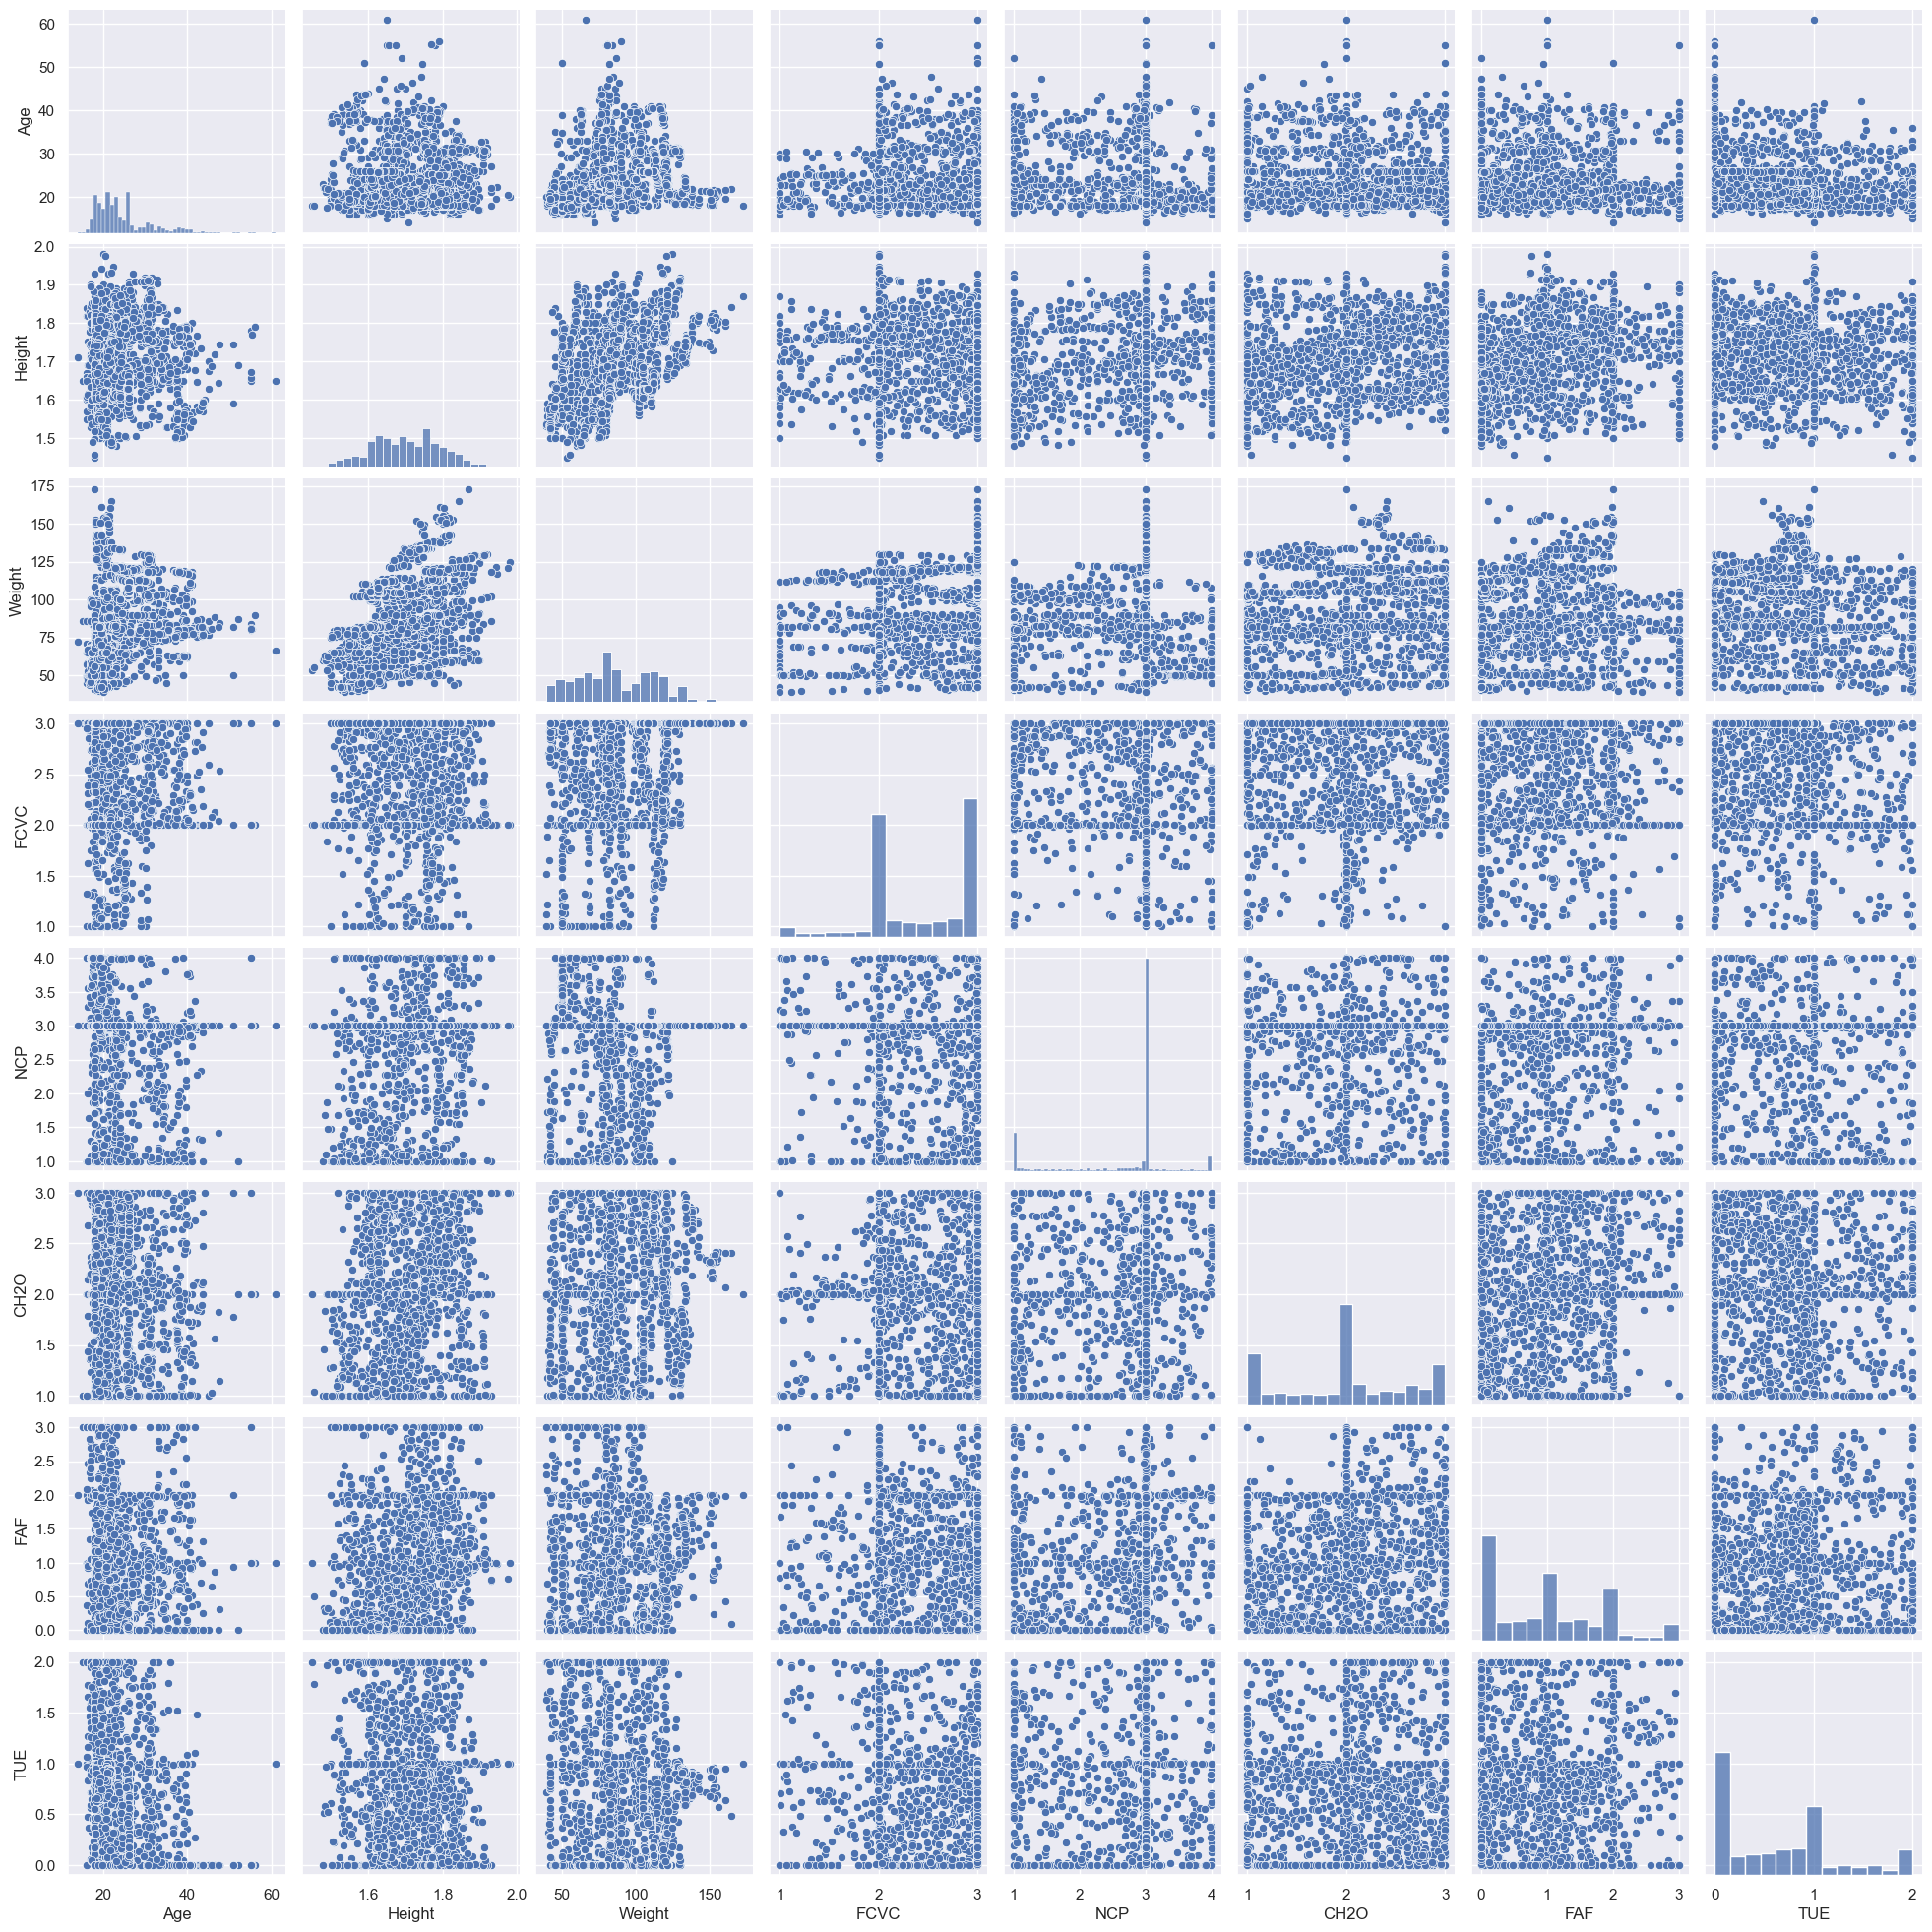

In [22]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data)

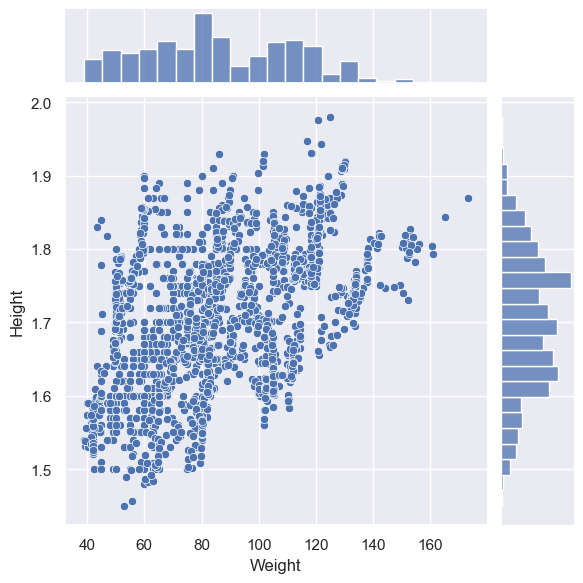

In [23]:
#since height and weight seems to have a correlation let's plot them
sns.jointplot(x='Weight',y='Height',data=raw_data)

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

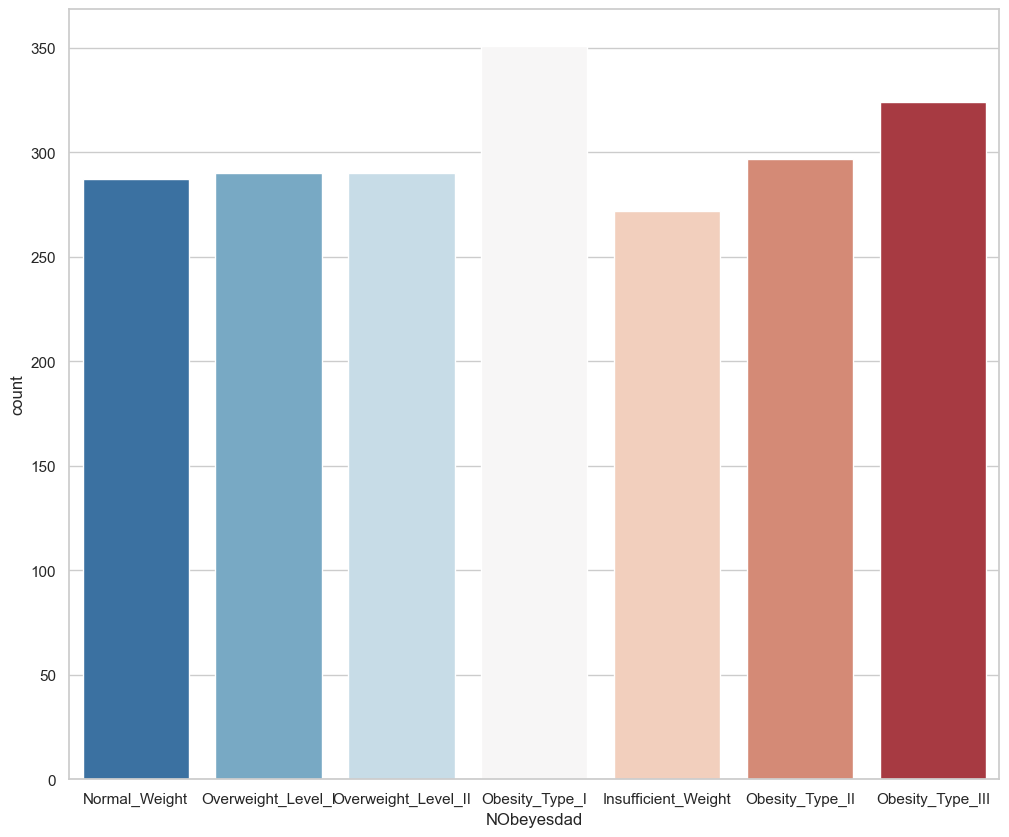

In [24]:
#let's check whether the target variables are inbalanced
sns.set_style('whitegrid')
sns.countplot(x='NObeyesdad',data=raw_data,palette='RdBu_r')

In [25]:
#checking for outliers
column_to_plot = 'NObeyesdad'

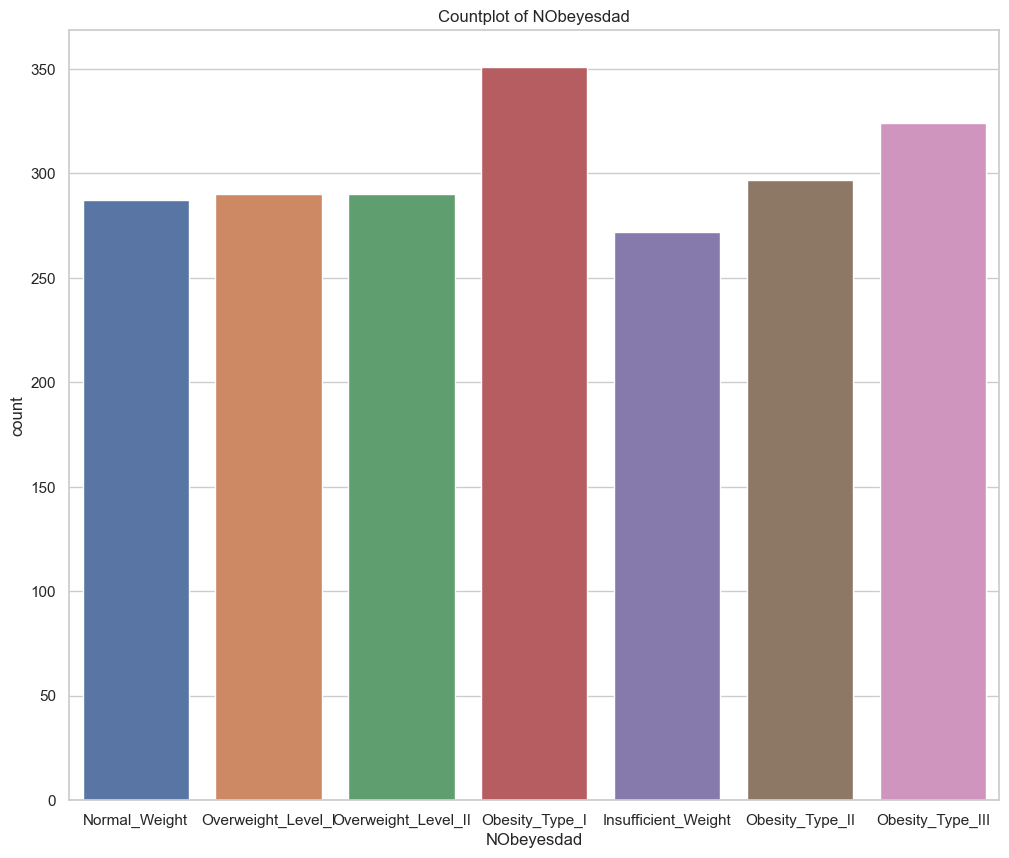

In [43]:
sns.countplot(x=raw_data['NObeyesdad'])
plt.xlabel('NObeyesdad')
plt.title('Countplot of NObeyesdad')
plt.show()

In [27]:
#removing unneccasary features(8,9 columns)
columns_to_remove = ['FCVC', 'NCP']

In [28]:
raw_data= raw_data.drop(columns=columns_to_remove)

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [30]:
#converting catogorical values to numerical foam
gender = pd.get_dummies(raw_data['Gender'],drop_first=True)
familyhistorywithoverweight = pd.get_dummies(raw_data['family_history_with_overweight'],drop_first=True)
favc = pd.get_dummies(raw_data['FAVC'],drop_first=True)
caec = pd.get_dummies(raw_data['CAEC'],drop_first=True)
smoke = pd.get_dummies(raw_data['SMOKE'],drop_first=True)
scc = pd.get_dummies(raw_data['SCC'],drop_first=True)
calc = pd.get_dummies(raw_data['CALC'],drop_first=True)
mtrans  = pd.get_dummies(raw_data['MTRANS'],drop_first=True)

In [31]:
raw_data.drop(['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'],axis=1,inplace=True)

In [32]:
raw_data = pd.concat([raw_data,gender,familyhistorywithoverweight,favc,caec,smoke,scc,calc,mtrans],axis=1)

In [33]:
raw_data.head()

,Age,Height,Weight,CH2O,FAF,TUE,NObeyesdad,Male,yes,yes,...,no,yes,yes,Frequently,Sometimes,no,Bike,Motorbike,Public_Transportation,Walking
0,21.0,1.62,64.0,2.0,0.0,1.0,Normal_Weight,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,0.0,Normal_Weight,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,2.0,1.0,Normal_Weight,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,2.0,2.0,0.0,Overweight_Level_I,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,0.0,0.0,Overweight_Level_II,1,0,0,...,0,0,0,0,1,0,0,0,1,0


# Objective 1

## Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

X = raw_data.drop('NObeyesdad', axis=1)
y = raw_data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.95
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.89      0.94      0.91        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       1.00      0.98      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.85      0.91      0.88        56
Overweight_Level_II       0.94      0.92      0.93        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423

Confusion Matrix:
 [[54  2  0  0  0  0  0]
 [ 1 58  0  0  0  3  0]
 [ 0  1 73  0  0  2  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 51  1]
 [ 0  0  0  0  0  4 46]]


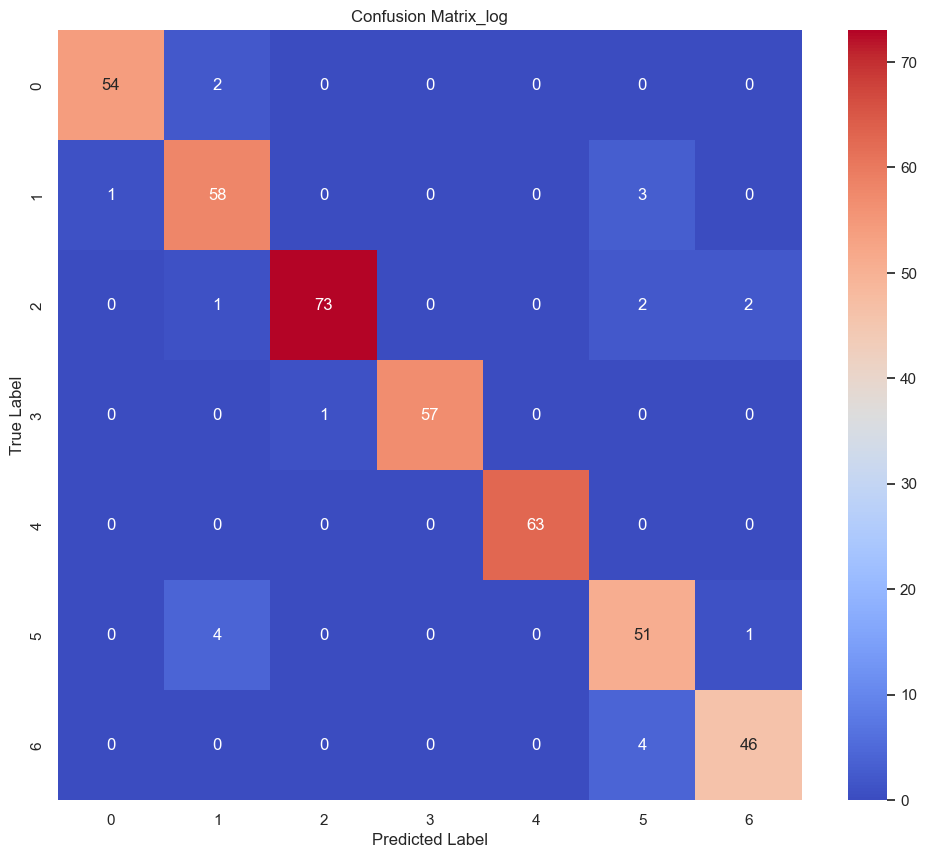

In [35]:
sns.heatmap(conf_matrix, annot=True, fmt="d" , cmap='coolwarm')
plt.title("Confusion Matrix_log")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Support Vector Machine

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report

In [37]:
X = raw_data.drop('NObeyesdad', axis=1)
y = raw_data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train the SVM Model
svm_model = SVC(kernel='linear')  # You can choose different kernels ('linear', 'rbf', 'poly', etc.)
svm_model.fit(X_train_scaled, y_train)

#Model Evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [38]:
#Evaluation Metrics (for classification tasks)
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        56
      Normal_Weight       0.96      0.84      0.90        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.98      0.98      0.98        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.93      0.92        56
Overweight_Level_II       0.94      0.96      0.95        50

           accuracy                           0.96       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.96      0.96      0.95       423

Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 7 52  0  0  0  3  0]
 [ 0  0 76  1  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 52  2]
 [ 0  0  0  0  0  2 48]]


## K Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Assuming raw_data is a DataFrame loaded from the dataset
X = raw_data.drop('NObeyesdad', axis=1)
y = raw_data['NObeyesdad']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
k = 4 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [41]:
# Display classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.82      0.98      0.89        56
      Normal_Weight       0.82      0.52      0.63        62
     Obesity_Type_I       0.87      0.97      0.92        78
    Obesity_Type_II       0.96      0.95      0.96        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.78      0.91      0.84        56
Overweight_Level_II       0.91      0.80      0.85        50

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.87       423
       weighted avg       0.88      0.88      0.87       423

Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [12 32  2  0  0 13  3]
 [ 0  0 76  1  1  0  0]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 51  1]
 [ 0  2  6  1  0  1 40]]
